#

# Model Testing Example

You have three groups. Test with ANOVA if the means are equal. Then test with t-tests which groups differ significantly. Plot the means with error bars. And mark the significant differences in the plot with asterisks (p<0.05 \*, p<0.01 \*\*, p<0.001 \*\*\*).


F-statistic: 13.0466, P-value: 0.0008
Reject the null hypothesis: At least one group mean is significantly different.
Pairwise P-values: Group 1 vs Group 2: 0.18727373944697856, Group 1 vs Group 3: 8.4881815276285e-06, Group 2 vs Group 3: 0.013143872015018094


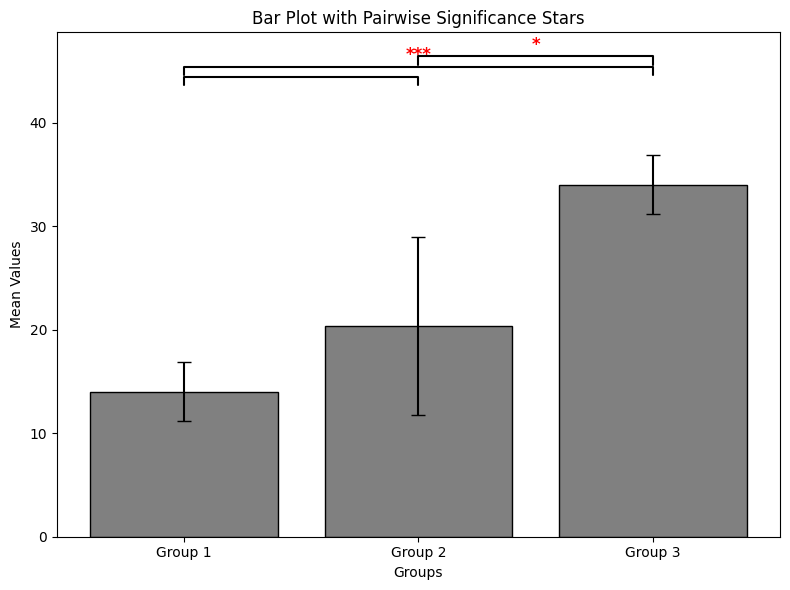

In [38]:


# Example: ANOVA test for grouped y values
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from matplotlib import pyplot as plt

# Group y values into categories
group1 = [10, 12, 14, 16, 18]
group2 = [20, 22, 2, 24, 26, 28]
group3 = [30, 32, 34, 36, 38]

# Perform ANOVA test
f_stat, p_value = f_oneway(group1, group2, group3)

# Print results
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")


# Perform pairwise t-tests
_, p_value_12 = ttest_ind(group1, group2)
_, p_value_13 = ttest_ind(group1, group3)
_, p_value_23 = ttest_ind(group2, group3)
print(f"Pairwise P-values: Group 1 vs Group 2: {p_value_12}, Group 1 vs Group 3: {p_value_13}, Group 2 vs Group 3: {p_value_23}")

# Combine data for plotting
groups = ['Group 1', 'Group 2', 'Group 3']
means = [np.mean(group1), np.mean(group2), np.mean(group3)]
errors = [np.std(group1), np.std(group2), np.std(group3)]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, means, yerr=errors, capsize=5, color='grey', edgecolor='black')

def add_significance(x1, x2, y, p_value):
    # Vertical spacing parameters
    line_spacing = 0.8  # Increased vertical separation
    bracket_height = 0.4  # Height of the bracket arms
    text_offset = 0.6  # Space between line and text
    
    # Draw connecting line with more spacing
    plt.plot(
        [x1, x1, x1 + (x2 - x1) * 0.2, x1 + (x2 - x1) * 0.8, x2, x2],  # X coordinates
        [y, y + line_spacing, y + line_spacing, y + line_spacing, y + line_spacing, y],  # Y coordinates
        color='black', 
        lw=1.5,
        solid_capstyle='round'  # Rounded line ends
    )
    
    # Calculate middle point with buffer
    mid_x = (x1 + x2) * 0.5
    text_y = y + line_spacing + text_offset
    
    # Add significance text with better positioning
    if p_value < 0.001:
        plt.text(mid_x, text_y, '***', ha='center', color='red', fontsize=12, weight='bold')
    elif p_value < 0.01:
        plt.text(mid_x, text_y, '**', ha='center', color='red', fontsize=12, weight='bold')
    elif p_value < 0.05:
        plt.text(mid_x, text_y, '*', ha='center', color='red', fontsize=12, weight='bold')
    
    # # Optional: Add horizontal buffer space
    # buffer = (x2 - x1) * 0.05
    # plt.xlim(left=min(x1, x2)-buffer, right=max(x1, x2)+buffer)


# Add lines and stars for pairwise comparisons
y_max = max(means) + max(errors)
add_significance(0, 1, y_max + 1, p_value_12)  # Group 1 vs Group 2
add_significance(0, 2, y_max + 2, p_value_13)  # Group 1 vs Group 3
add_significance(1, 2, y_max + 3, p_value_23)  # Group 2 vs Group 3

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Mean Values')
plt.title('Bar Plot with Pairwise Significance Stars')
plt.tight_layout()
plt.show()
